In [1]:
from pyuba.uba import PyUba

uba = PyUba()

x_data = [1, 3, 7, 14, 30, 60, 90, 180]
y_data = [80, 70, 55, 50, 30, 22, 10, 8]
facebook = uba.create_profile(days=x_data, retention_values=y_data)

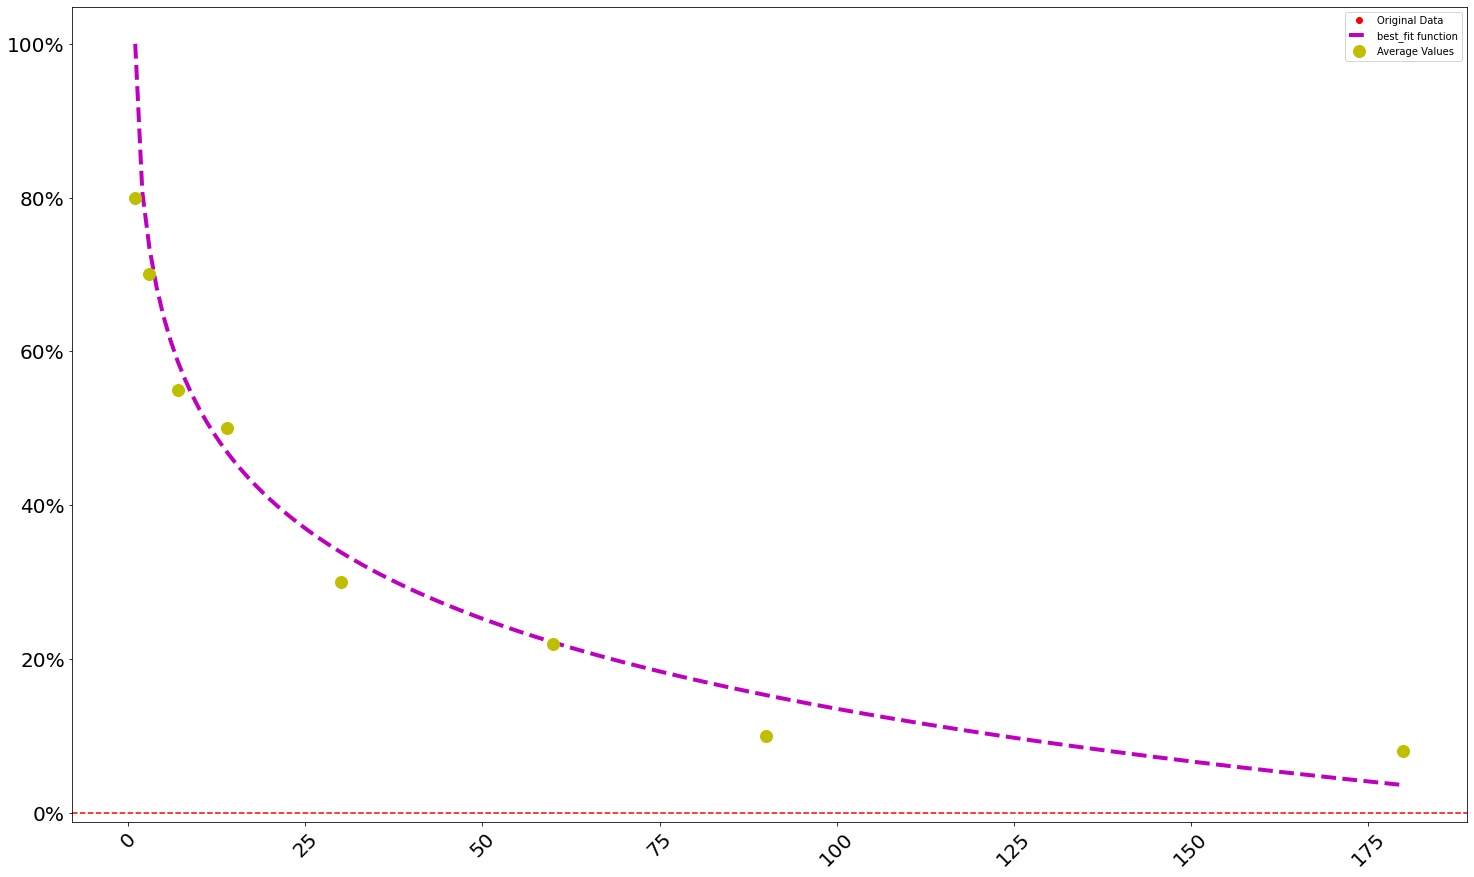

In [2]:
uba.plot_retention(facebook)

In [3]:
cohorts = [1000, 1000, 1000, 1000, 1000]

facebook_dau = uba.project_cohorted_DAU(
    profile=facebook, periods=50, cohorts=cohorts, start_date=1
)

print(facebook_dau)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']
                  1       2       3       4       5      6      7      8  \
cohort_date                                                                
1.0          1000.0   807.0   734.0   684.0   645.0  613.0  587.0  564.0   
2.0             0.0  1000.0   807.0   734.0   684.0  645.0  613.0  587.0   
3.0             0.0     0.0  1000.0   807.0   734.0  684.0  645.0  613.0   
4.0             0.0     0.0     0.0  1000.0   807.0  734.0  684.0  645.0   
5.0             0.0     0.0     0.0     0.0  1000.0  807.0  734.0  684.0   

                 9     10  ...     41     42     43     44     45     46  \
cohort_date                ...                                             
1.0          543.0  525